In [52]:

!apt-get install openjdk-8-jdk-headless -qq > /dev/null

!wget -q https://archive.apache.org/dist/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz
!tar xf spark-3.4.1-bin-hadoop3.tgz

!pip install -q pyspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.1-bin-hadoop3"
os.environ["PATH"] = os.environ["SPARK_HOME"] + "/bin:" + os.environ["PATH"]

!java -version
!echo $JAVA_HOME
!echo $SPARK_HOME

from pyspark.sql import SparkSession
from pyspark import SparkConf

conf = SparkConf() \
    .setAppName("ipl_analysis") \
    .setMaster("local[*]") \
    .set("spark.driver.memory", "2g") \
    .set("spark.executor.memory", "2g") \
    .set("spark.sql.shuffle.partitions", "200") \
    .set("spark.driver.maxResultSize", "1g") \
    .set("spark.jars.packages", "org.apache.spark:spark-sql_2.12:3.4.1")

spark = SparkSession.builder.config(conf=conf).getOrCreate()

spark.range(5).show()


openjdk version "11.0.23" 2024-04-16
OpenJDK Runtime Environment (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1)
OpenJDK 64-Bit Server VM (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1, mixed mode, sharing)
/usr/lib/jvm/java-8-openjdk-amd64
/content/spark-3.4.1-bin-hadoop3
+---+
| id|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
+---+



In [53]:
!pip install pyspark
!pip install hadoop-aws

ERROR: Could not find a version that satisfies the requirement hadoop-aws (from versions: none)
ERROR: No matching distribution found for hadoop-aws


In [54]:
!tar xf spark-3.3.1-bin-hadoop3.tgz
!mv spark-3.3.1-bin-hadoop3 /usr/local/spark

# Download the Hadoop AWS JAR
!wget -q https://repo1.maven.org/maven2/org/apache/hadoop/hadoop-aws/3.2.0/hadoop-aws-3.2.0.jar -P /usr/local/spark/jars/
!wget -q https://repo1.maven.org/maven2/com/amazonaws/aws-java-sdk-bundle/1.12.318/aws-java-sdk-bundle-1.12.318.jar -P /usr/local/spark/jars/


tar: spark-3.3.1-bin-hadoop3.tgz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now
mv: cannot stat 'spark-3.3.1-bin-hadoop3': No such file or directory


In [55]:
ball_by_ball = spark.read.csv('/content/Ball_By_Ball.csv', header=True, inferSchema=True)

In [56]:
ball_by_ball.show()

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+---+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|MatcH_id|Over_id|Ball_id|Innings_No|Team_Batting|Team_Bowling|Striker_Batting_Position|Extra_Type|Runs_Scored|Extra_runs|Wides|Legbyes|Byes|Noballs|Penalty|Bowler_Extras|      Out_type|Caught|Bowled|Run_out|LBW|Retired_hurt|Stumped|caught_and_bowled|hit_wicket|ObstructingFeild|Bowler_Wicket|Match_Date|Season|Striker|Non_Striker|Bowler|Player_Out|Fielders|Striker_match_SK|StrikerSK|NonStriker_match_SK|NONStriker_SK|Fielder_match_SK|Fi

In [57]:


ball_by_ball.printSchema()


root
 |-- MatcH_id: integer (nullable = true)
 |-- Over_id: integer (nullable = true)
 |-- Ball_id: integer (nullable = true)
 |-- Innings_No: integer (nullable = true)
 |-- Team_Batting: string (nullable = true)
 |-- Team_Bowling: string (nullable = true)
 |-- Striker_Batting_Position: integer (nullable = true)
 |-- Extra_Type: string (nullable = true)
 |-- Runs_Scored: integer (nullable = true)
 |-- Extra_runs: integer (nullable = true)
 |-- Wides: integer (nullable = true)
 |-- Legbyes: integer (nullable = true)
 |-- Byes: integer (nullable = true)
 |-- Noballs: integer (nullable = true)
 |-- Penalty: integer (nullable = true)
 |-- Bowler_Extras: integer (nullable = true)
 |-- Out_type: string (nullable = true)
 |-- Caught: integer (nullable = true)
 |-- Bowled: integer (nullable = true)
 |-- Run_out: integer (nullable = true)
 |-- LBW: integer (nullable = true)
 |-- Retired_hurt: integer (nullable = true)
 |-- Stumped: integer (nullable = true)
 |-- caught_and_bowled: integer (null

In [58]:
from pyspark.sql.types import IntegerType, StringType, StructField, StructType, DateType, DecimalType, FloatType



In [59]:
schema = StructType([
    StructField("MatcH_id", IntegerType(), True),
    StructField("Over_id", IntegerType(), True),
    StructField("Ball_id", IntegerType(), True),
    StructField("Innings_No", IntegerType(), True),
    StructField("Team_Batting", StringType(), True),
    StructField("Team_Bowling", StringType(), True),
    StructField("Striker_Batting_Position", IntegerType(), True),
    StructField("Extra_Type", StringType(), True),
    StructField("Runs_Scored", IntegerType(), True),
    StructField("Extra_runs", IntegerType(), True),
    StructField("Wides", IntegerType(), True),
    StructField("Legbyes", IntegerType(), True),
    StructField("Byes", IntegerType(), True),
    StructField("Noballs", IntegerType(), True),
    StructField("Penalty", IntegerType(), True),
    StructField("Bowler_Extras", IntegerType(), True),
    StructField("Out_type", StringType(), True),
    StructField("Caught", IntegerType(), True),
    StructField("Bowled", IntegerType(), True),
    StructField("Run_out", IntegerType(), True),
    StructField("LBW", IntegerType(), True),
    StructField("Retired_hurt", IntegerType(), True),
    StructField("Stumped", IntegerType(), True),
    StructField("caught_and_bowled", IntegerType(), True),
    StructField("hit_wicket", IntegerType(), True),
    StructField("ObstructingFeild", IntegerType(), True),
    StructField("Bowler_Wicket", IntegerType(), True),
    StructField("Match_Date", StringType(), True),
    StructField("Season", IntegerType(), True),
    StructField("Striker", IntegerType(), True),
    StructField("Non_Striker", IntegerType(), True),
    StructField("Bowler", IntegerType(), True),
    StructField("Player_Out", IntegerType(), True),
    StructField("Fielders", IntegerType(), True),
    StructField("Striker_match_SK", IntegerType(), True),
    StructField("StrikerSK", IntegerType(), True),
    StructField("NonStriker_match_SK", IntegerType(), True),
    StructField("NONStriker_SK", IntegerType(), True),
    StructField("Fielder_match_SK", IntegerType(), True),
    StructField("Fielder_SK", IntegerType(), True),
    StructField("Bowler_match_SK", IntegerType(), True),
    StructField("BOWLER_SK", IntegerType(), True),
    StructField("PlayerOut_match_SK", IntegerType(), True),
    StructField("BattingTeam_SK", IntegerType(), True),
    StructField("BowlingTeam_SK", IntegerType(), True),
    StructField("Keeper_Catch", IntegerType(), True),
    StructField("Player_out_sk", IntegerType(), True),
    StructField("MatchDateSK", IntegerType(), True)
])



In [60]:
ball_by_ball.printSchema()

root
 |-- MatcH_id: integer (nullable = true)
 |-- Over_id: integer (nullable = true)
 |-- Ball_id: integer (nullable = true)
 |-- Innings_No: integer (nullable = true)
 |-- Team_Batting: string (nullable = true)
 |-- Team_Bowling: string (nullable = true)
 |-- Striker_Batting_Position: integer (nullable = true)
 |-- Extra_Type: string (nullable = true)
 |-- Runs_Scored: integer (nullable = true)
 |-- Extra_runs: integer (nullable = true)
 |-- Wides: integer (nullable = true)
 |-- Legbyes: integer (nullable = true)
 |-- Byes: integer (nullable = true)
 |-- Noballs: integer (nullable = true)
 |-- Penalty: integer (nullable = true)
 |-- Bowler_Extras: integer (nullable = true)
 |-- Out_type: string (nullable = true)
 |-- Caught: integer (nullable = true)
 |-- Bowled: integer (nullable = true)
 |-- Run_out: integer (nullable = true)
 |-- LBW: integer (nullable = true)
 |-- Retired_hurt: integer (nullable = true)
 |-- Stumped: integer (nullable = true)
 |-- caught_and_bowled: integer (null

In [61]:
match = spark.read.csv('/content/Match.csv', header=True, inferSchema=True)

In [62]:
match.show()

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+
|Match_SK|match_id|               Team1|               Team2|match_date|Season_Year|          Venue_Name| City_Name|Country_Name|         Toss_Winner|        match_winner|Toss_Name|Win_Type|Outcome_Type|    ManOfMach|Win_Margin|Country_id|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...| 4/18/2008|       2008|M Chinnaswamy Sta...| Bangalore|       India|Royal Challengers...|Kolkata Knight Ri...|    field|    runs|      Result|  BB McCullum|       140|         1|
|       1|  335988|     Kings XI Punjab|

In [63]:
match.printSchema()

root
 |-- Match_SK: integer (nullable = true)
 |-- match_id: integer (nullable = true)
 |-- Team1: string (nullable = true)
 |-- Team2: string (nullable = true)
 |-- match_date: string (nullable = true)
 |-- Season_Year: integer (nullable = true)
 |-- Venue_Name: string (nullable = true)
 |-- City_Name: string (nullable = true)
 |-- Country_Name: string (nullable = true)
 |-- Toss_Winner: string (nullable = true)
 |-- match_winner: string (nullable = true)
 |-- Toss_Name: string (nullable = true)
 |-- Win_Type: string (nullable = true)
 |-- Outcome_Type: string (nullable = true)
 |-- ManOfMach: string (nullable = true)
 |-- Win_Margin: string (nullable = true)
 |-- Country_id: integer (nullable = true)



In [64]:
match_schema = StructType([
    StructField("PLAYER_SK", IntegerType(), True),
    StructField("Player_Id", IntegerType(), True),
    StructField("Player_Name", StringType(), True),
    StructField("DOB", StringType(), True),  # Date of Birth as String
    StructField("Batting_hand", StringType(), True),
    StructField("Bowling_skill", StringType(), True),
    StructField("Country_Name", StringType(), True)
])

In [100]:
player = spark.read.csv('/content/Player.csv', header=True, inferSchema=True)

In [101]:
player.show()

+---------+---------+---------------+----------+--------------+--------------------+------------+
|PLAYER_SK|Player_Id|    Player_Name|       DOB|  Batting_hand|       Bowling_skill|Country_Name|
+---------+---------+---------------+----------+--------------+--------------------+------------+
|        0|        1|     SC Ganguly|  7/8/1972| Left-hand bat|    Right-arm medium|       India|
|        1|        2|    BB McCullum| 9/27/1981|Right-hand bat|    Right-arm medium| New Zealand|
|        2|        3|     RT Ponting|12/19/1974|Right-hand bat|    Right-arm medium|   Australia|
|        3|        4|      DJ Hussey| 7/15/1977|Right-hand bat|  Right-arm offbreak|   Australia|
|        4|        5|Mohammad Hafeez|10/17/1980|Right-hand bat|  Right-arm offbreak|    Pakistan|
|        5|        6|       R Dravid| 1/11/1973|Right-hand bat|  Right-arm offbreak|       India|
|        6|        7|       W Jaffer| 2/16/1978|Right-hand bat|  Right-arm offbreak|       India|
|        7|        8

In [102]:
player.printSchema()

root
 |-- PLAYER_SK: integer (nullable = true)
 |-- Player_Id: integer (nullable = true)
 |-- Player_Name: string (nullable = true)
 |-- DOB: string (nullable = true)
 |-- Batting_hand: string (nullable = true)
 |-- Bowling_skill: string (nullable = true)
 |-- Country_Name: string (nullable = true)



In [103]:
match_schema = StructType([
    StructField("Match_SK", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("Team1", StringType(), True),
    StructField("Team2", StringType(), True),
    StructField("match_date", StringType(), True),
    StructField("Season_Year", IntegerType(), True),
    StructField("Venue_Name", StringType(), True),
    StructField("City_Name", StringType(), True),
    StructField("Country_Name", StringType(), True),
    StructField("Toss_Winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("Toss_Name", StringType(), True),
    StructField("Win_Type", StringType(), True),
    StructField("Outcome_Type", StringType(), True),
    StructField("ManOfMach", StringType(), True),
    StructField("Win_Margin", StringType(), True),
    StructField("Country_id", IntegerType(), True)
])

In [114]:
player_match = spark.read.csv('/content/Player_match.csv', header=True, inferSchema=True)

In [115]:
player_match.show()

+---------------+---------------+--------+---------+---------------+----------+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+
|Player_match_SK|PlayerMatch_key|Match_Id|Player_Id|    Player_Name|       DOB|  Batting_hand|       Bowling_skill|Country_Name|Role_Desc|         Player_team|        Opposit_Team|Season_year|is_manofThematch|Age_As_on_match|IsPlayers_Team_won|Batting_Status|Bowling_Status|Player_Captain|Opposit_captain|Player_keeper|Opposit_keeper|
+---------------+---------------+--------+---------+---------------+----------+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+-----------

In [116]:
player_match.printSchema()

root
 |-- Player_match_SK: integer (nullable = true)
 |-- PlayerMatch_key: double (nullable = true)
 |-- Match_Id: integer (nullable = true)
 |-- Player_Id: integer (nullable = true)
 |-- Player_Name: string (nullable = true)
 |-- DOB: string (nullable = true)
 |-- Batting_hand: string (nullable = true)
 |-- Bowling_skill: string (nullable = true)
 |-- Country_Name: string (nullable = true)
 |-- Role_Desc: string (nullable = true)
 |-- Player_team: string (nullable = true)
 |-- Opposit_Team: string (nullable = true)
 |-- Season_year: integer (nullable = true)
 |-- is_manofThematch: integer (nullable = true)
 |-- Age_As_on_match: integer (nullable = true)
 |-- IsPlayers_Team_won: integer (nullable = true)
 |-- Batting_Status: string (nullable = true)
 |-- Bowling_Status: string (nullable = true)
 |-- Player_Captain: string (nullable = true)
 |-- Opposit_captain: string (nullable = true)
 |-- Player_keeper: string (nullable = true)
 |-- Opposit_keeper: string (nullable = true)



In [117]:
player_match_schema = StructType([
    StructField("Player_Id", IntegerType(), True),
    StructField("Player_Name", StringType(), True),
    StructField("DOB", StringType(), True),  # Date of Birth as String
    StructField("Batting_hand", StringType(), True),
    StructField("Bowling_skill", StringType(), True),
    StructField("Country_Name", StringType(), True),
    StructField("Role_Desc", StringType(), True),
    StructField("Player_team", StringType(), True),
    StructField("Opposit_Team", StringType(), True),
    StructField("Season_year", IntegerType(), True),
    StructField("is_manofThematch", IntegerType(), True),
    StructField("Age_As_on_match", IntegerType(), True),
    StructField("IsPlayers_Team_won", IntegerType(), True),
    StructField("Batting_Status", StringType(), True),
    StructField("Bowling_Status", StringType(), True),
    StructField("Player_Captain", StringType(), True),
    StructField("Opposit_captain", StringType(), True),
    StructField("Player_keeper", StringType(), True),
    StructField("Opposit_keeper", StringType(), True)
])

In [71]:
team = spark.read.csv('/content/Team.csv', header=True, inferSchema=True)

In [72]:
team.printSchema()

root
 |-- Team_SK: integer (nullable = true)
 |-- Team_Id: integer (nullable = true)
 |-- Team_Name: string (nullable = true)



In [73]:
team_schema = StructType([
    StructField("Team_SK", IntegerType(), True),
    StructField("Team_Id", IntegerType(), True),
    StructField("Team_Name", StringType(), True)
])

Transformations


filtering to keep only valid deliveries (Removing wide and no balls)

In [74]:
from pyspark.sql.functions import col, when, sum, avg, row_number, count
ball_by_ball = ball_by_ball.filter((col("wides") == 0) & (col("noballs") == 0))

calculating the total and avg run score in each match and inning

In [75]:
total_and_avg = ball_by_ball.groupBy("MatcH_id", "Innings_No").agg(
    sum("runs_scored").alias("total_runs"),
    avg("runs_scored").alias("avg_runs")
)

calculating running total of runs in each match for each row

In [76]:
from pyspark.sql.window import Window
windowSpec = Window.partitionBy("MatcH_id", "Innings_No").orderBy("Over_id")
ball_by_ball = ball_by_ball.withColumn("running_total", sum("runs_scored").over(windowSpec))
ball_by_ball.show()

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+---+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+-------------+
|MatcH_id|Over_id|Ball_id|Innings_No|Team_Batting|Team_Bowling|Striker_Batting_Position|Extra_Type|Runs_Scored|Extra_runs|Wides|Legbyes|Byes|Noballs|Penalty|Bowler_Extras|      Out_type|Caught|Bowled|Run_out|LBW|Retired_hurt|Stumped|caught_and_bowled|hit_wicket|ObstructingFeild|Bowler_Wicket|Match_Date|Season|Striker|Non_Striker|Bowler|Player_Out|Fielders|Striker_match_SK|StrikerSK|NonStriker_match_SK|NONStriker_SK|Field

Conditional Column: flag for high imapact balls (either a wicket or 6 runs including extras)

In [77]:
ball_by_ball = ball_by_ball.withColumn("high_impact", when((col("Bowler_Wicket")== True) | (col("runs_scored") + col("extra_runs") > 6), True).otherwise(False))

In [78]:
ball_by_ball.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+---+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+-------------+-----------+
|MatcH_id|Over_id|Ball_id|Innings_No|Team_Batting|Team_Bowling|Striker_Batting_Position|Extra_Type|Runs_Scored|Extra_runs|Wides|Legbyes|Byes|Noballs|Penalty|Bowler_Extras|      Out_type|Caught|Bowled|Run_out|LBW|Retired_hurt|Stumped|caught_and_bowled|hit_wicket|ObstructingFeild|Bowler_Wicket|Match_Date|Season|Striker|Non_Striker|Bowler|Player_Out|Fielders|Striker_match_SK|StrikerSK|NonStriker_match_SK|NONStri

# for match df

In [79]:
from pyspark.sql.functions import year, month, dayofmonth, when

Extracting year, month, and day from the match date for more detailed time-based analysis

In [80]:
match = match.withColumn("year", year("match_date"))
match = match.withColumn("month", month("match_date"))
match = match.withColumn("day", dayofmonth("match_date"))
match.show()

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+----+-----+----+
|Match_SK|match_id|               Team1|               Team2|match_date|Season_Year|          Venue_Name| City_Name|Country_Name|         Toss_Winner|        match_winner|Toss_Name|Win_Type|Outcome_Type|    ManOfMach|Win_Margin|Country_id|year|month| day|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+----+-----+----+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...| 4/18/2008|       2008|M Chinnaswamy Sta...| Bangalore|       India|Royal Challengers...|Kolkata Knight Ri...|    field|    runs|      Result|  BB McCullum|       140|    

High margin win: categorizing win margins into 'high', 'medium', and 'low'

In [81]:
match = match.withColumn(
    "win_margin_category",
    when(col("win_margin") >= 100, "High")
    .when((col("win_margin") >= 50) & (col("win_margin") < 100), "Medium")
    .otherwise("Low")
)

Analyze the impact of the toss: who wins the toss and the match

In [82]:
match = match.withColumn(
    "toss_match_winner",
    when(col("toss_winner") == col("match_winner"), "Yes").otherwise("No")
)

In [83]:
match.show()

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+----+-----+----+-------------------+-----------------+
|Match_SK|match_id|               Team1|               Team2|match_date|Season_Year|          Venue_Name| City_Name|Country_Name|         Toss_Winner|        match_winner|Toss_Name|Win_Type|Outcome_Type|    ManOfMach|Win_Margin|Country_id|year|month| day|win_margin_category|toss_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+----+-----+----+-------------------+-----------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...| 4/18/2008|       2008|M Chinnaswamy Sta...| Bangalore|  

# For Player df

In [84]:
from pyspark.sql.functions import lower, regexp_replace, col

Normalize and clean player names

In [85]:
player = player.withColumn("player_name", lower(regexp_replace("player_name", "[^a-zA-Z0-9 ]", "")))

Handle missing values in 'batting_hand' and 'bowling_skill' with a default 'unknown'

In [86]:
player = player.na.fill({"batting_hand": "unknown", "bowling_skill": "unknown"})

Categorizing players based on batting hand

In [87]:
player = player.withColumn(
    "batting_style",
    when(col("batting_hand").contains("left"), "Left-Handed").otherwise("Right-Handed")
)

In [88]:
player.show()

+---------+---------+---------------+----------+--------------+--------------------+------------+-------------+
|PLAYER_SK|Player_Id|    player_name|       DOB|  Batting_hand|       Bowling_skill|Country_Name|batting_style|
+---------+---------+---------------+----------+--------------+--------------------+------------+-------------+
|        0|        1|     sc ganguly|  7/8/1972| Left-hand bat|    Right-arm medium|       India| Right-Handed|
|        1|        2|    bb mccullum| 9/27/1981|Right-hand bat|    Right-arm medium| New Zealand| Right-Handed|
|        2|        3|     rt ponting|12/19/1974|Right-hand bat|    Right-arm medium|   Australia| Right-Handed|
|        3|        4|      dj hussey| 7/15/1977|Right-hand bat|  Right-arm offbreak|   Australia| Right-Handed|
|        4|        5|mohammad hafeez|10/17/1980|Right-hand bat|  Right-arm offbreak|    Pakistan| Right-Handed|
|        5|        6|       r dravid| 1/11/1973|Right-hand bat|  Right-arm offbreak|       India| Right-

# For player_match

Adding a 'veteran_status' column based on player age

Dynamic column to calculate years since debut

Show the enriched DataFrame

In [119]:
from pyspark.sql.functions import col, when, current_date, expr

player_match = player_match.withColumn(
    "veteran_status",
    when(col("age_as_on_match") >= 35, "Veteran").otherwise("Non-Veteran")
)

player_match = player_match.withColumn(
    "years_since_debut",
    (year(current_date()) - col("season_year"))
)

player_match.show()


+---------------+---------------+--------+---------+---------------+----------+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+--------------+-----------------+
|Player_match_SK|PlayerMatch_key|Match_Id|Player_Id|    Player_Name|       DOB|  Batting_hand|       Bowling_skill|Country_Name|Role_Desc|         Player_team|        Opposit_Team|Season_year|is_manofThematch|Age_As_on_match|IsPlayers_Team_won|Batting_Status|Bowling_Status|Player_Captain|Opposit_captain|Player_keeper|Opposit_keeper|veteran_status|years_since_debut|
+---------------+---------------+--------+---------+---------------+----------+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+-----

In [120]:
ball_by_ball.createOrReplaceTempView("ball_by_ball")
match.createOrReplaceTempView("match")
player.createOrReplaceTempView("player")
player_match.createOrReplaceTempView("player_match")
team.createOrReplaceTempView("team")

In [123]:
print(type(spark))

# If it's not, recreate the SparkSession
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()


<class 'pyspark.sql.session.SparkSession'>


In [127]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("CricketAnalysis") \
    .getOrCreate()


In [134]:

player_match.createOrReplaceTempView("player_match")
ball_by_ball.createOrReplaceTempView("ball_by_ball")


In [131]:
from py4j.protocol import Py4JError


In [135]:
ball_by_ball.columns

['MatcH_id',
 'Over_id',
 'Ball_id',
 'Innings_No',
 'Team_Batting',
 'Team_Bowling',
 'Striker_Batting_Position',
 'Extra_Type',
 'Runs_Scored',
 'Extra_runs',
 'Wides',
 'Legbyes',
 'Byes',
 'Noballs',
 'Penalty',
 'Bowler_Extras',
 'Out_type',
 'Caught',
 'Bowled',
 'Run_out',
 'LBW',
 'Retired_hurt',
 'Stumped',
 'caught_and_bowled',
 'hit_wicket',
 'ObstructingFeild',
 'Bowler_Wicket',
 'Match_Date',
 'Season',
 'Striker',
 'Non_Striker',
 'Bowler',
 'Player_Out',
 'Fielders',
 'Striker_match_SK',
 'StrikerSK',
 'NonStriker_match_SK',
 'NONStriker_SK',
 'Fielder_match_SK',
 'Fielder_SK',
 'Bowler_match_SK',
 'BOWLER_SK',
 'PlayerOut_match_SK',
 'BattingTeam_SK',
 'BowlingTeam_SK',
 'Keeper_Catch',
 'Player_out_sk',
 'MatchDateSK',
 'running_total',
 'high_impact']

In [136]:
match.columns

['Match_SK',
 'match_id',
 'Team1',
 'Team2',
 'match_date',
 'Season_Year',
 'Venue_Name',
 'City_Name',
 'Country_Name',
 'Toss_Winner',
 'match_winner',
 'Toss_Name',
 'Win_Type',
 'Outcome_Type',
 'ManOfMach',
 'Win_Margin',
 'Country_id',
 'year',
 'month',
 'day',
 'win_margin_category',
 'toss_match_winner']

In [137]:
player.columns

['PLAYER_SK',
 'Player_Id',
 'Player_Name',
 'DOB',
 'Batting_hand',
 'Bowling_skill',
 'Country_Name']

In [138]:
player_match.columns

['Player_match_SK',
 'PlayerMatch_key',
 'Match_Id',
 'Player_Id',
 'Player_Name',
 'DOB',
 'Batting_hand',
 'Bowling_skill',
 'Country_Name',
 'Role_Desc',
 'Player_team',
 'Opposit_Team',
 'Season_year',
 'is_manofThematch',
 'Age_As_on_match',
 'IsPlayers_Team_won',
 'Batting_Status',
 'Bowling_Status',
 'Player_Captain',
 'Opposit_captain',
 'Player_keeper',
 'Opposit_keeper',
 'veteran_status',
 'years_since_debut']

In [139]:
team.columns

['Team_SK', 'Team_Id', 'Team_Name']

# Finding the top-scoring batsman per season for each over

In [140]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum as _sum, max as _max, row_number
from pyspark.sql.window import Window

In [141]:
spark = SparkSession.builder \
    .appName("Top Scoring Batsman Per Season Per Over") \
    .getOrCreate()


Aggregate runs scored by each batsman per season and per over

In [142]:
runs_per_season_over = ball_by_ball.groupBy('Season', 'Over_id', 'Striker') \
    .agg(_sum('Runs_Scored').alias('Total_Runs'))

Add player names for better readability (join with player DataFrame)

In [143]:
runs_with_names = runs_per_season_over.join(player, runs_per_season_over.Striker == player.Player_Id, 'left') \
    .select('Season', 'Over_id', 'Striker', 'Player_Name', 'Total_Runs')

Use window function to rank players by their total runs within each season and over

In [144]:
window_spec = Window.partitionBy('Season', 'Over_id').orderBy(col('Total_Runs').desc())


Identify the top scorer for each season and each over

In [145]:
top_scorers = runs_with_names.withColumn('rank', row_number().over(window_spec)) \
    .filter(col('rank') == 1) \
    .select('Season', 'Over_id', 'Player_Name', 'Total_Runs')

In [151]:
top_scorers.show()

+------+-------+-------------+----------+
|Season|Over_id|  Player_Name|Total_Runs|
+------+-------+-------------+----------+
|  2008|      1| AC Gilchrist|        57|
|  2008|      2|ST Jayasuriya|        87|
|  2008|      3|ST Jayasuriya|        61|
|  2008|      4|    G Gambhir|        54|
|  2008|      5|    G Gambhir|        71|
|  2008|      6|ST Jayasuriya|        65|
|  2008|      7|     SE Marsh|        45|
|  2008|      8|     SE Marsh|        44|
|  2008|      9|     SE Marsh|        56|
|  2008|     10|    SR Watson|        46|
|  2008|     11|     SE Marsh|        53|
|  2008|     12|    YK Pathan|        42|
|  2008|     13|    SR Watson|        44|
|  2008|     14|    G Gambhir|        42|
|  2008|     15|       M Kaif|        48|
|  2008|     16|   MV Boucher|        41|
|  2008|     17|    RG Sharma|        57|
|  2008|     18|    DJ Hussey|        46|
|  2008|     19|     MS Dhoni|        52|
|  2008|     20|    PP Chawla|        40|
+------+-------+-------------+----

# Most Economical Player in Power Play
Step 1: Filter for power play overs (typically the first 6 overs)

Step 2: Calculate total runs conceded by each bowler during power play

Step 3: Calculate the number of balls bowled by each bowler during power play

 Step 4: Join the two DataFrames to get both runs conceded and balls bowled for each bowler


Step 5: Calculate the economy rate for each bowler (runs conceded per over).
 An over consists of 6 balls


Step 6: Add player names for better readability (join with player DataFrame)

Step 7: Identify the most economical bowler (lowest economy rate)

In [152]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum as _sum, count, lit

spark = SparkSession.builder \
    .appName("Most Economical Player in Power Play") \
    .getOrCreate()


power_play = ball_by_ball.filter(col('Over_id') <= 6)


runs_conceded = power_play.groupBy('Bowler').agg(_sum('Runs_Scored').alias('Total_Runs_Conceded'))

balls_bowled = power_play.filter(col('Extra_Type').isNull() | ~col('Extra_Type').isin('Wides', 'Noballs')) \
    .groupBy('Bowler').agg(count(lit(1)).alias('Balls_Bowled'))
bowler_stats = runs_conceded.join(balls_bowled, 'Bowler')

bowler_stats = bowler_stats.withColumn('Economy_Rate', col('Total_Runs_Conceded') / (col('Balls_Bowled') / 6))

bowler_stats = bowler_stats.join(player, bowler_stats.Bowler == player.Player_Id, 'left') \
    .select('Bowler', 'Player_Name', 'Total_Runs_Conceded', 'Balls_Bowled', 'Economy_Rate')


most_economical_bowler = bowler_stats.orderBy('Economy_Rate').first()

print("Most Economical Bowler in Power Play:")
print(f"Bowler ID: {most_economical_bowler['Bowler']}")
print(f"Player Name: {most_economical_bowler['Player_Name']}")
print(f"Total Runs Conceded: {most_economical_bowler['Total_Runs_Conceded']}")
print(f"Balls Bowled: {most_economical_bowler['Balls_Bowled']}")
print(f"Economy Rate: {most_economical_bowler['Economy_Rate']}")


Most Economical Bowler in Power Play:
Bowler ID: 184
Player Name: SM Harwood
Total Runs Conceded: 6
Balls Bowled: 18
Economy Rate: 2.0


In [166]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum as _sum, count, lit, desc
import pandas as pd

spark = SparkSession.builder \
    .appName("Most Economical Player in Power Play") \
    .getOrCreate()

power_play = ball_by_ball.filter(col('Over_id') <= 6)

runs_conceded = power_play.groupBy('Bowler').agg(_sum('Runs_Scored').alias('Total_Runs_Conceded'))

balls_bowled = power_play.filter(col('Extra_Type').isNull() | ~col('Extra_Type').isin('Wides', 'Noballs')) \
    .groupBy('Bowler').agg(count(lit(1)).alias('Balls_Bowled'))

bowler_stats = runs_conceded.join(balls_bowled, 'Bowler')

bowler_stats = bowler_stats.withColumn('Economy_Rate', col('Total_Runs_Conceded') / (col('Balls_Bowled') / 6))

bowler_stats = bowler_stats.join(player, bowler_stats.Bowler == player.Player_Id, 'left') \
    .select('Bowler', 'Player_Name', 'Total_Runs_Conceded', 'Balls_Bowled', 'Economy_Rate')

sorted_bowlers = bowler_stats.orderBy(desc('Economy_Rate'))

# Collect data and convert to Pandas DataFrame
bowlers_list = sorted_bowlers.collect()
bowlers_pd = pd.DataFrame([row.asDict() for row in bowlers_list])

print(bowlers_pd)



     Bowler     Player_Name  Total_Runs_Conceded  Balls_Bowled  Economy_Rate
0        41        V Sehwag                   41            12          20.5
1       317      RR Bhatkal                   20             6          20.0
2       325  A Ashish Reddy                   20             6          20.0
3       454        MG Neser                   18             6          18.0
4        13       AA Noffke                   17             6          17.0
..      ...             ...                  ...           ...           ...
287     254        AJ Finch                    3             6           3.0
288     180       GR Napier                    3             6           3.0
289     474      Avesh Khan                    6            12           3.0
290     430         A Zampa                    3             6           3.0
291     184      SM Harwood                    6            18           2.0

[292 rows x 5 columns]


In [153]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import when, col

spark = SparkSession.builder.appName("Toss Impact Analysis").getOrCreate()

toss_impact = match.withColumn(
    'Toss_Impact',
    when(col('Toss_Winner') == col('match_winner'), 'Win').otherwise('Lose')
)

toss_impact_result = toss_impact.groupBy('Toss_Impact').count()

toss_impact_result.show()


+-----------+-----+
|Toss_Impact|count|
+-----------+-----+
|        Win|  324|
|       Lose|  313|
+-----------+-----+



In [156]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, sum as _sum

spark = SparkSession.builder.appName("Average Runs in Wins").getOrCreate()

runs_per_match = ball_by_ball.groupBy('MatcH_id', 'Team_Batting').agg(_sum('Runs_Scored').alias('Total_Runs'))

winning_matches = match.filter(col('match_winner').isNotNull())

winning_runs = runs_per_match.join(winning_matches, runs_per_match.MatcH_id == winning_matches.match_id) \
    .filter(runs_per_match.Team_Batting == winning_matches.match_winner) \
    .select(runs_per_match.MatcH_id, 'Total_Runs')

average_runs = winning_runs.agg(avg('Total_Runs').alias('Average_Runs')).first()['Average_Runs']

print(f"Average Runs in Wins: {average_runs}")



Average Runs in Wins: 157.6206896551724


In [157]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, sum as _sum

spark = SparkSession.builder.appName("Top 10 Players with Average Runs").getOrCreate()

total_runs_per_player = ball_by_ball.groupBy('Striker').agg(_sum('Runs_Scored').alias('Total_Runs'))

matches_per_player = ball_by_ball.select('MatcH_id', 'Striker').distinct() \
    .groupBy('Striker').count().alias('Matches_Played')

player_stats = total_runs_per_player.join(matches_per_player, 'Striker') \
    .withColumn('Average_Runs', col('Total_Runs') / col('count'))

player_with_names = player_stats.join(player, player_stats.Striker == player.Player_Id, 'left') \
    .select('Player_Name', 'Average_Runs')

top_10_players = player_with_names.orderBy(col('Average_Runs').desc()).limit(10)

top_10_players.show()


+-----------+------------------+
|Player_Name|      Average_Runs|
+-----------+------------------+
|LMP Simmons|37.206896551724135|
|   CH Gayle|             36.06|
|    HM Amla|           35.9375|
|   SE Marsh| 35.84057971014493|
|  DA Warner| 34.95614035087719|
|  ML Hayden|             34.25|
| MEK Hussey| 34.06896551724138|
| MN van Wyk|              32.6|
|    CA Lynn|31.833333333333332|
|    V Kohli| 31.21985815602837|
+-----------+------------------+



# Visualizations

In [163]:
print(type(most_economical_bowler))




<class 'pyspark.sql.types.Row'>


<ipython-input-172-e8e9ecb56c8c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Economy_Rate', y='Player_Name', data=top_10_bowlers, palette='viridis')


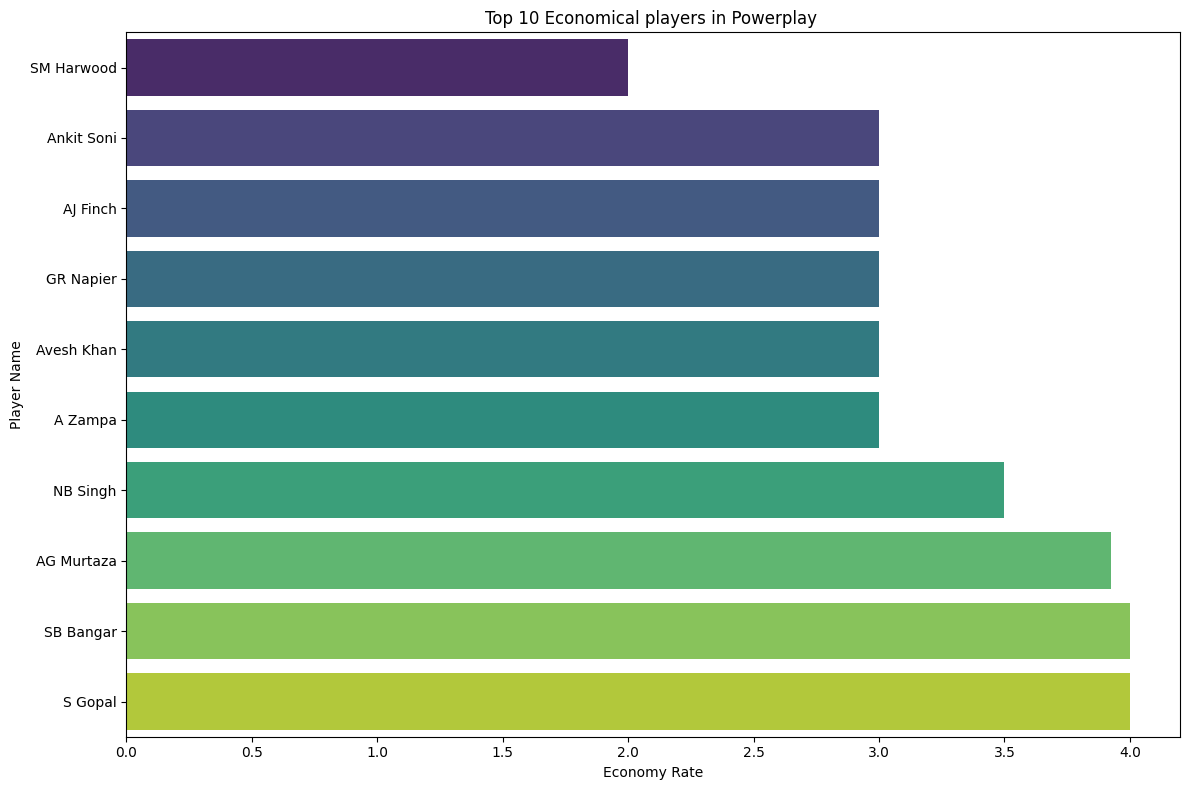

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


top_10_bowlers = bowlers_pd.nsmallest(10, 'Economy_Rate')

plt.figure(figsize=(12, 8))
sns.barplot(x='Economy_Rate', y='Player_Name', data=top_10_bowlers, palette='viridis')
plt.xlabel('Economy Rate')
plt.ylabel('Player Name')
plt.title('Top 10 Economical players in Powerplay ')
plt.tight_layout()
plt.show()



<ipython-input-174-2c87fceb5ebd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Team_Name', y='Win_Percentage', data=toss_impact_pd, palette='viridis')


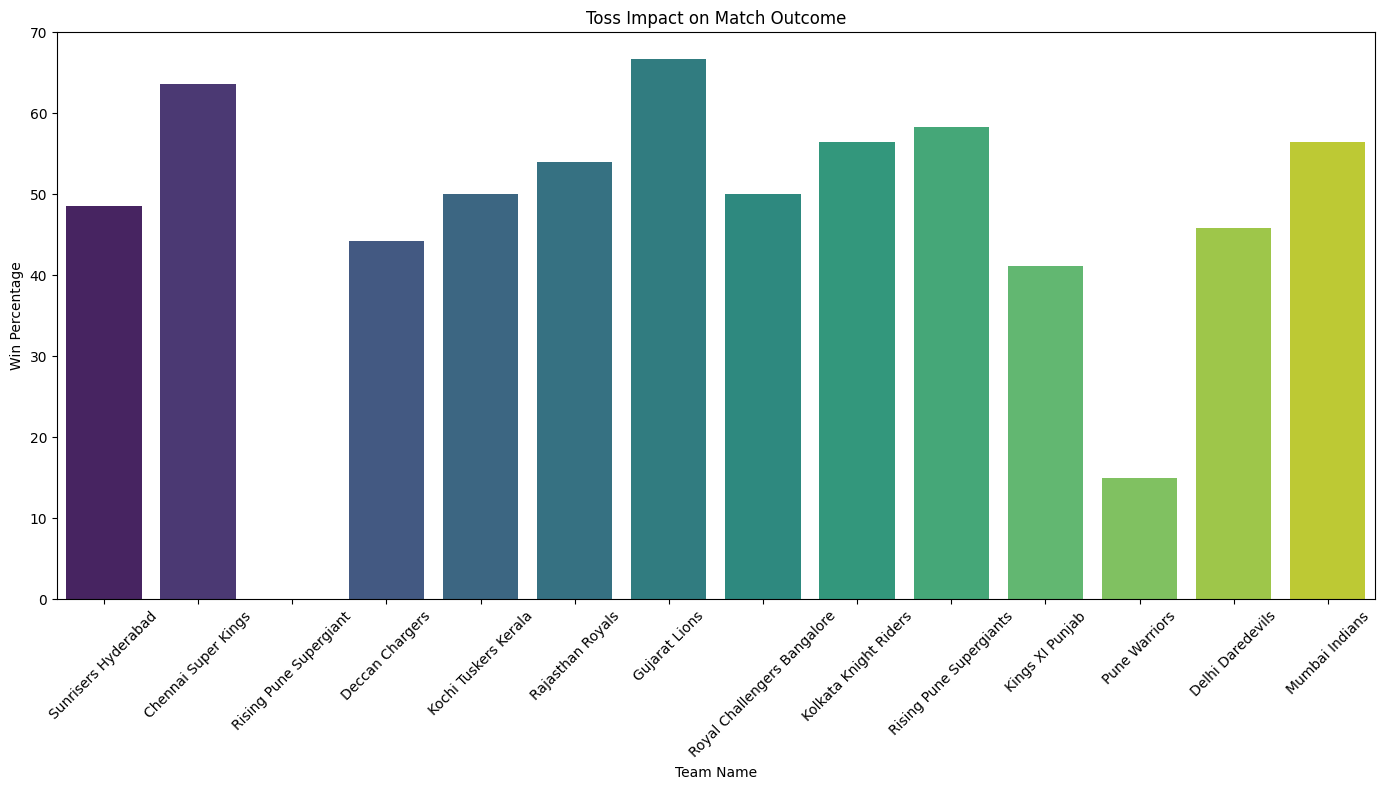

In [174]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when, lit

spark = SparkSession.builder \
    .appName("Toss Impact Analysis") \
    .getOrCreate()

toss_impact = match.join(player_match, match.match_id == player_match.Match_Id) \
    .select('Team1', 'Team2', 'Toss_Winner', 'match_winner') \
    .withColumn('Won_Match', col('Toss_Winner') == col('match_winner'))

toss_impact_summary = toss_impact.groupBy('Toss_Winner').agg(
    count(when(col('Won_Match'), 1)).alias('Matches_Won'),
    count(lit(1)).alias('Total_Matches')
).withColumn('Win_Percentage', (col('Matches_Won') / col('Total_Matches')) * 100)

toss_impact_summary = toss_impact_summary.withColumnRenamed('Toss_Winner', 'Team_Name')

# Collect data and convert to Pandas DataFrame
toss_impact_list = toss_impact_summary.collect()
toss_impact_pd = pd.DataFrame([row.asDict() for row in toss_impact_list])

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.barplot(x='Team_Name', y='Win_Percentage', data=toss_impact_pd, palette='viridis')
plt.xlabel('Team Name')
plt.ylabel('Win Percentage')
plt.title('Toss Impact on Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
